<a href="https://colab.research.google.com/github/pjcarney/PyTorch/blob/main/Pytorch_Regression_Line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

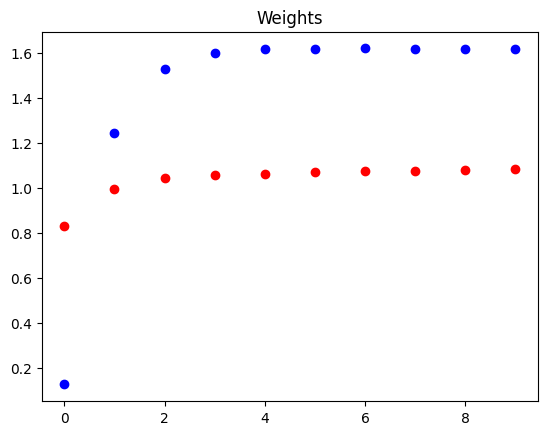

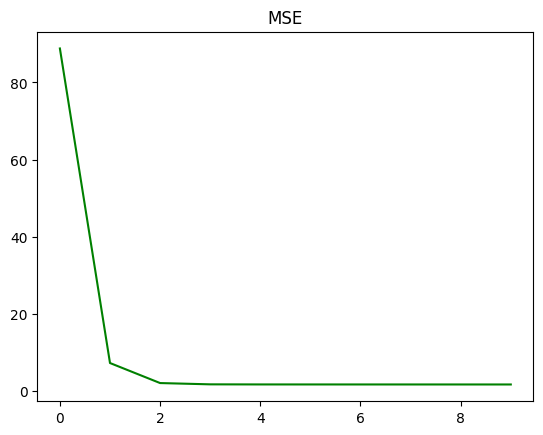

In [ ]:
import torch # tensors and mathematical operations on those tensors.
import matplotlib.pyplot as plt # for plotting graphs

torch.manual_seed(6)
torch.set_printoptions(precision=2)

X = torch.randint(low=0, high=11, size=(20,1)) # Generate an array of 20 random numbers between 1 and 10
normal = torch.distributions.Normal(loc=0,scale=1) # Create a normal distribution centered on zero with stdev = 1

Y = (1.5*X + 2) + normal.sample(X.shape) # Create the Y values from the random X values with the normal distribution values added as noise.


# For this model the equation is y = w[1]*x + w[0]

torch.manual_seed(5)
w = torch.rand(size=(2,1)) # Create randomly initialized weights

#print(w)

# Function to predict the Y values from the X values (inputs)
def model(w, X):
  return w[1] * X + w[0]

# Pred = model(w, X)

#plt.scatter(X, Y)
#plt.scatter(X, pred)

# Define the error function, we will be using the mean squared error for the error function.

def MSE(Pred, Y):

  return torch.mean((Pred - Y)**2)  # Calculate the squared error for each predicted value.  Return the mean of all the errors.

def plot_lbf(): # Function to plot the actual vs. predicted values

  plt.scatter(X, Y) # Crete a scatter plot of the actual X and Y values.

  Pred = model(w, X) # Generate the predicted values from the model with the current weights

  plt.scatter(X, Pred, zorder=3)  # Create a scatter plot of the inputs and predictions from the model.

  X_plot = torch.arange(-1,11.1,.1) # Create a bunch of x values to generate a line.
  plt.plot(X_plot, model(w, X_plot), 'r-') # Generate the best fit line.

  # Format the axes and add the error to the label.
  plt.xlim(-1,11)
  error = MSE(Pred, Y)
  plt.title(f"MSE: {error:.2f}")

# Gradient descent.
# Update the weights by the negative of the of the derivative of the cost function with respect to that weight times the learning rate.
# Negative because you want to go downhill on the loss function to minimize the error.
# For the mean squared error function you use the chain rule to get the derivative which is derivative of the outer function times the derivative of the inner function.
def gradient_descent(w):

  n = len(X) # Get the number of input values so we can calculate the mean.

  w[0] = w[0] - lr * 2/n * torch.sum(model(w,X) - Y) # Update W0
  w[1] = w[1] - lr * 2/n * torch.sum(X *(model(w,X) - Y)) # Update W1

  return w # return the updated weights

lr = 0.01  # define the learning rate

#print("Weights before: ", w.flatten())
#print("MSE before: ", MSE(model(w,X), Y))

# Update the weights.
#w = gradient_descent(w)

#print("Weights after: ", w.flatten())
#print("MSE before: ", MSE(model(w,X), Y))

#plot_lbf()

# Train the model
w0_list = []
w1_list = []
mse_list = []

for i in range(0, 10): # Train the model through 500 iterations

  w1_list.append(w[0].item())
  w0_list.append(w[1].item())
  Pred = model(w, X)
  mse = MSE(Pred, Y)
  mse_list.append(mse)

  w = gradient_descent(w) # Update the weights.

# plot_lbf()

plt.title("Weights")
plt.plot(w1_list, 'ro')
plt.plot(w0_list, 'bo')
plt.show()

plt.title("MSE")
plt.plot(mse_list, 'g-')


